<a href="https://colab.research.google.com/github/hanna-joo/project/blob/master/Consumption_Trends_2020/02_hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 6 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144617 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()

mpl.rcParams['axes.unicode_minus'] = False

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [ ]:
corona = pd.read_excel('/content/gdrive/Shared drives/청년취업아카데미_KDX한국데이터거래소/Data/코로나확진자/Covid19InfState.xlsx')
# 날짜 중복값 처리
corona = corona.drop_duplicates(['stateDt'],keep='last')
corona['stateDt'] = corona['stateDt'].astype('str')
corona = corona.reset_index()

# 결측치 처리
corona['decideCnt'][0] = 0
corona['decideCnt'][3] = 15
corona.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,index,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
0,0,1,20200101,18:00,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31 17:47:33.33,2020-02-03 12:21:56.56
1,1,2,20200202,09:00,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2020-02-03 12:22:49.49,NaN
2,2,3,20200203,09:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 14:41:17.17,2020-02-04 14:19:46.46
3,3,4,20200204,00:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 21:26:59.59,NaN
4,5,6,20200205,19:00,19.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-05 20:05:40.40,2020-02-06 10:05:36.36


In [ ]:
# 일별확진자 수 구하기
corona['decideCnt_day'] = corona['decideCnt']
for i in range(len(corona)):
  try:
    corona['decideCnt_day'][i] =  corona['decideCnt'][i+1] - corona['decideCnt'][i]
  except:
    corona['decideCnt_day'][i] = 61   # 9/25일 일별확진자 수는 네이버에서 가져옴
corona.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,index,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt,decideCnt_day
0,0,1,20200101,18:00,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31 17:47:33.33,2020-02-03 12:21:56.56,2.0
1,1,2,20200202,09:00,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2020-02-03 12:22:49.49,NaN,13.0
2,2,3,20200203,09:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 14:41:17.17,2020-02-04 14:19:46.46,0.0
3,3,4,20200204,00:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 21:26:59.59,NaN,4.0
4,5,6,20200205,19:00,19.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-05 20:05:40.40,2020-02-06 10:05:36.36,4.0


In [ ]:
corona_backup = corona.copy()

# 가설 검증 과정

## 업종별 구매수 분석 (직접 영향권)
## 1. 온라인 데이터

### 1.1. 2019년, 2020년 상반기 구매건수 비교
#### (a) 증감율 도출 및 시각화

In [ ]:
# 소비업종 카테고리 가져오기
categories = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/04_kdx/data_in/Mcorporation/KDX_CONTEST_파일정의서.xlsx')['xlsx 파일 이름'].values
categories = list(categories)

# 온라인 데이터 가져오기
mcorp =  pd.read_csv('/content/gdrive/Shared drives/청년취업아카데미_KDX한국데이터거래소/Data/mcorp_edit.csv')
mcorp['소비연월'] = [str(x)[:6] for x in mcorp['소비일자']]
mcorp.head()

,소비일자,소비업종,성별,연령대,OS유형,소비금액,소비건수,소비연월
0,20190101,PC사무기기,F,10,IOS,352443,13,201901
1,20190101,PC사무기기,F,10,WINDOWS,84000,1,201901
2,20190101,PC사무기기,F,10,안드로이드,80870,8,201901
3,20190101,PC사무기기,F,10,없음,3700,1,201901
4,20190101,PC사무기기,F,20,IOS,27714776,381,201901


In [ ]:
# 2019년 데이터 1-6월 업종별 그룹화하기
sdate=201901
edate=201906
dates = list(range(sdate, edate+1))

mcorp_19 = pd.DataFrame()
for date in dates:
  mcorp_date=mcorp[mcorp['소비연월']== str(date)].groupby(['소비업종'])['소비건수', '소비금액'].sum()
  mcorp_date.columns=['{}_소비건수'.format(str(date)[2:]),'{}_소비금액'.format(str(date)[2:])]
  mcorp_19 = pd.concat([mcorp_19, mcorp_date], axis=1)

mcorp_19['19_소비건수'] = mcorp_19['1901_소비건수'] + mcorp_19['1902_소비건수'] + mcorp_19['1903_소비건수'] + mcorp_19['1904_소비건수'] + mcorp_19['1905_소비건수'] + mcorp_19['1906_소비건수']
mcorp_19['19_소비금액'] = mcorp_19['1901_소비금액'] + mcorp_19['1902_소비금액'] + mcorp_19['1903_소비금액'] + mcorp_19['1904_소비금액'] + mcorp_19['1905_소비금액'] + mcorp_19['1906_소비금액']

# 2020년 데이터 1-6월 업종별 그룹화하기
sdate=202001
edate=202006
dates = list(range(sdate, edate+1))

mcorp_20 = pd.DataFrame()
for date in dates:
  mcorp_date=mcorp[mcorp['소비연월']== str(date)].groupby(['소비업종'])['소비건수', '소비금액'].sum()
  mcorp_date.columns=['{}_소비건수'.format(str(date)[2:]),'{}_소비금액'.format(str(date)[2:])]
  mcorp_20 = pd.concat([mcorp_20, mcorp_date], axis=1)

mcorp_20['20_소비건수'] = mcorp_20['2001_소비건수'] + mcorp_20['2002_소비건수'] + mcorp_20['2003_소비건수'] + mcorp_20['2004_소비건수'] + mcorp_20['2005_소비건수'] + mcorp_20['2006_소비건수']
mcorp_20['20_소비금액'] = mcorp_20['2001_소비금액'] + mcorp_20['2002_소비금액'] + mcorp_20['2003_소비금액'] + mcorp_20['2004_소비금액'] + mcorp_20['2005_소비금액'] + mcorp_20['2006_소비금액']

mcorp_20.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,2001_소비건수,2001_소비금액,2002_소비건수,2002_소비금액,2003_소비건수,2003_소비금액,2004_소비건수,2004_소비금액,2005_소비건수,2005_소비금액,2006_소비건수,2006_소비금액,20_소비건수,20_소비금액
소비업종,,,,,,,,,,,,,,
PC사무기기,231856,40046572083,227062,40202529551,268263,46619058195,248593,40589721437,219470,32488699040,214901,31434658204,1410145,231381238510
TV홈시어터,27049,9753775487,24813,8957341298,28906,10127692085,27079,9693247302,25403,8921136195,23444,6689177546,156694,54142369913


In [ ]:
# 증감율 구하기
temp_19=mcorp_19[['19_소비건수', '19_소비금액']]
temp_20=mcorp_20[['20_소비건수', '20_소비금액']]
mcorp_compare_all = pd.concat([temp_19, temp_20], axis=1)

mcorp_compare_all['소비건수_증감율'] = (mcorp_compare_all['20_소비건수'] - mcorp_compare_all['19_소비건수']) / mcorp_compare_all['19_소비건수'] * 100
mcorp_compare_all['소비금액_증감율'] = (mcorp_compare_all['20_소비금액'] - mcorp_compare_all['19_소비금액']) / mcorp_compare_all['19_소비금액'] * 100

mcorp_compare = mcorp_compare_all[mcorp_compare_all.index.isin(categories)]

# 핵심 컬럼만 가져오기
mcorp_inc = mcorp_compare[['19_소비건수','20_소비건수','소비건수_증감율']]
mcorp_inc.head()

,19_소비건수,20_소비건수,소비건수_증감율
소비업종,,,
PC사무기기,1319034,1410145,6.907403
TV홈시어터,132732,156694,18.052919
가공식품,14256302,22524055,57.993672
가방지갑잡화,3537425,3419719,-3.327449
건강관련용품,1024147,3606075,252.105215


### 1.2. 2019, 2020년 2-3월 / 코로나 하루 확진자 상관계수
#### (a) 피어슨 상관관계 분석

In [ ]:
# 소비건수 구하는 함수(소비일자와 소비업종별)
def categorical_cnt(category='category',sdate=20200101, edate=20201231):
  df = pd.DataFrame(mcorp[mcorp['소비업종']==category].groupby(['소비일자'])['소비건수'].sum())
  df = df[df.index >= sdate]
  df = df[df.index <= edate]
  df.index = df.index.astype('str')
  return df

In [ ]:
# 코로나 확진자 수 구하는 함수(확진일자별)
corona = corona_backup.copy()
corona = corona[['stateDt','decideCnt_day']]
corona.columns=['소비일자','일일확진자']

def corona_cnt(sdate=20200101, edate=20201231):
  df_corona = corona[['소비일자','일일확진자']]
  df_corona.소비일자 = df_corona.소비일자.astype('int64')
  df_corona = df_corona[df_corona.소비일자 >= sdate]
  df_corona = df_corona[df_corona.소비일자 <= edate]
  df_corona.소비일자 = df_corona.소비일자.astype('str')
  return df_corona

In [ ]:
# 상관관계 구하기
mcorp_cate = mcorp_inc.copy()
mcorp_cate['코로나_corr'] = 1.0
mcorp_cate['코로나_pvalue'] = 1.0

from scipy import stats
sday = 20200201
eday = 20200331
for i, category in enumerate(categories):
  df = categorical_cnt(category,sday,eday)
  df_corona = corona_cnt(sday,eday)
  df_new = df.merge(df_corona, how='outer',on='소비일자')
  corr = stats.pearsonr(df_new.소비건수, df_new.일일확진자)

  mcorp_cate['코로나_corr'][i] = corr[0]
  mcorp_cate['코로나_pvalue'][i] = corr[1]
mcorp_cate

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/u

,19_소비건수,20_소비건수,소비건수_증감율,코로나_corr,코로나_pvalue
소비업종,,,,,
PC사무기기,1319034,1410145,6.907403,0.151964,0.246418
TV홈시어터,132732,156694,18.052919,0.347715,0.006484
가공식품,14256302,22524055,57.993672,0.501398,0.000045
가방지갑잡화,3537425,3419719,-3.327449,0.175307,0.180323
건강관련용품,1024147,3606075,252.105215,0.508515,0.000033
...,...,...,...,...,...
캠핑용품,314647,429750,36.581630,0.203185,0.119459
테마의류,173026,245466,41.866540,0.469916,0.000152
헤어바디용품,1810070,2536360,40.124968,0.475457,0.000124


In [ ]:
mcorp_cate.sort_values(by='소비건수_증감율', ascending=False).head(10)

,19_소비건수,20_소비건수,소비건수_증감율,코로나_corr,코로나_pvalue
소비업종,,,,,
건강관련용품,1024147,3606075,252.105215,0.508515,3.349749e-05
안전용품,257926,658823,155.431015,0.645026,2.653699e-08
업소위생용품,46250,107801,133.083243,-0.445657,3.591686e-04
가공식품,14256302,22524055,57.993672,0.501398,4.487259e-05
농축수산물,6201243,9542768,53.884761,-0.146624,2.636067e-01
주방조리기구,852537,1263701,48.228288,0.128783,3.267610e-01
테마의류,173026,245466,41.866540,0.469916,1.517606e-04
헤어바디용품,1810070,2536360,40.124968,0.475457,1.235170e-04
주방식기용기,1431300,1960844,36.997415,0.317801,1.334564e-02


In [ ]:
cate_rate_top10 = list(mcorp_cate.sort_values(by='소비건수_증감율', ascending=False).head(10).index)
cate_rate_top10

['건강관련용품',
 '안전용품',
 '업소위생용품',
 '가공식품',
 '농축수산물',
 '주방조리기구',
 '테마의류',
 '헤어바디용품',
 '주방식기용기',
 '캠핑용품']

In [ ]:
# BI 분석용: 카테고리별 소비건수 및 증감율, 상관관계 저장하기
mcorp_cate.to_csv('/content/gdrive/Shared drives/청년취업아카데미_KDX한국데이터거래소/Data/mcorp_cate_inc.csv')

#### (b) 상관계수 히트맵 시각화


In [ ]:
mcorp.head()

,소비일자,소비업종,성별,연령대,OS유형,소비금액,소비건수,소비연월
0,20190101,PC사무기기,F,10,IOS,352443,13,201901
1,20190101,PC사무기기,F,10,WINDOWS,84000,1,201901
2,20190101,PC사무기기,F,10,안드로이드,80870,8,201901
3,20190101,PC사무기기,F,10,없음,3700,1,201901
4,20190101,PC사무기기,F,20,IOS,27714776,381,201901


In [ ]:
corona.head()

,소비일자,일일확진자
0,20200201,2
1,20200202,13
2,20200203,0
3,20200204,4
4,20200205,4


In [ ]:
# 기간별, 업종별 소비건수 합계 추출
def categorical_cnt(category='category',sdate=20200101, edate=20201231):
  mcorp['소비일자'] = mcorp['소비일자'].astype('int')
  df = pd.DataFrame(mcorp[mcorp['소비업종']==category].groupby(['소비일자'])['소비건수'].sum())
  df_s = df[df.index >= sdate]
  df_e = df_s[df_s.index <= edate]
  df_e.reset_index(drop=False,inplace=True)
  df_e.columns=['소비일자','소비건수']
  df_e['소비일자'] = df_e['소비일자'].astype('str')
  return df_e

In [ ]:
# 기간별, 업종별 소비건수 및 코로나 일일확진자수 데이터프레임생성
def categorical_corona_cnt(category='category',sdate=20200101, edate=20201231):
  df = pd.merge(categorical_cnt(category,sdate, edate),corona_cnt(sdate, edate))
  df.columns=['소비일자',category,'일일확진자수']
  return df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

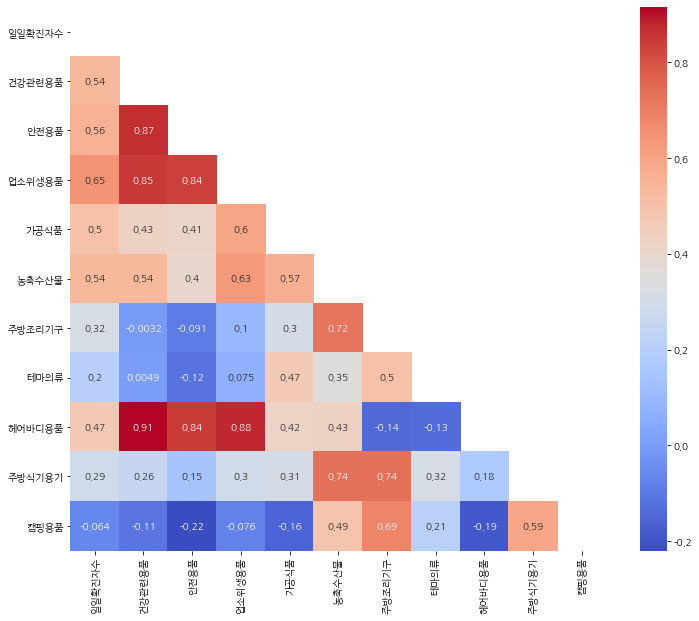

In [ ]:
sdate = 20200201
edate = 20200331
categories = cate_rate_top10.copy()
corr = pd.DataFrame()
for category in categories:
  corr['일일확진자수'] = categorical_corona_cnt(category,sdate,edate)['일일확진자수']
  category_value = categorical_corona_cnt(category,sdate,edate)[category]
  corr[category] = category_value
corr.set_index(categorical_corona_cnt(category,sdate, edate)['소비일자'],inplace=True)

# 히트맵 시각화
corr_heatmap = corr.corr()
plt.rcParams['figure.figsize']=[12,10]

mask = np.zeros_like(corr_heatmap, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_heatmap, annot=True, mask=mask, cmap='coolwarm')

### 1.3. 임의의 기준(상관관계,증감율)에 부합하는 업종 추출
- 업종 선정 방법
  + 소비건수 증가율이 

In [ ]:
증감률 = pd.DataFrame(mcorp_inc['소비건수_증감률']).reset_index()
코로나상관계수 = pd.DataFrame(corr_heatmap['일일확진자수']).sort_values(by='일일확진자수').reset_index()
top_3 = pd.merge(증감률,코로나상관계수)
top_3.set_index('index',inplace=True)
top_3 = top_3.head(3)
top_3

In [ ]:
def corona_categorical_scatter(category='category',sdate=20200101,edate=20201231):
  card_df = categorical_cnt(category=category,sdate=sdate, edate=edate)
  corona_df = corona_cnt(sdate=sdate,edate=edate)
  card_corona_df = pd.merge(card_df,corona_df, how='outer', on='날짜')
  
  plt.figure(figsize=(5,5))
  plt.scatter(card_corona_df['일일확진자수'],card_corona_df['소비건수'])

  plt.xlabel('일일확진자수')
  plt.ylabel('소비건수')
  plt.title(category)

  print(stats.pearsonr(card_corona_df['소비건수'],card_corona_df['일일확진자수']))
  plt.show()

In [ ]:
top_3_categories = top_3.index.values
for category in top_3_categories:
  corona_categorical_scatter(category,sdate=20200201,edate=20200331)

### 1.4. 선정된 업종별 집단간 소비 행태 분석
#### (a) 코로나 전후 업종내 나이성별에 따른 집단 구매 건수
#### (b) 집단간 구매 건수 비교 및 변화량 비교 시각화(누적막대?)
#### (c) OS형태별 업종, 연령 순위

### 연령대별 소비업종 분석하기
- 대상 : 20대 - 50대
  - 시장점유율 높은 순서대로 나열
  - 증감율 높은 것 기준으로 선정

In [4]:
# 소비업종 카테고리 가져오기
categories = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/04_kdx/data_in/Mcorporation/KDX_CONTEST_파일정의서.xlsx')['xlsx 파일 이름'].values
categories = list(categories)

# 온라인 데이터 가져오기
mcorp =  pd.read_csv('/content/gdrive/Shared drives/청년취업아카데미_KDX한국데이터거래소/Data/mcorp_edit.csv')
mcorp['소비연월'] = [str(x)[:6] for x in mcorp['소비일자']]
mcorp.head()

,소비일자,소비업종,성별,연령대,OS유형,소비금액,소비건수,소비연월
0,20190101,PC사무기기,F,10,IOS,352443,13,201901
1,20190101,PC사무기기,F,10,WINDOWS,84000,1,201901
2,20190101,PC사무기기,F,10,안드로이드,80870,8,201901
3,20190101,PC사무기기,F,10,없음,3700,1,201901
4,20190101,PC사무기기,F,20,IOS,27714776,381,201901


In [72]:
ages = [20,30,40,50]
mcorp_ages = pd.DataFrame()
for age in ages:
  # 업종별 소비 비중 구하기
  mcorp20 = mcorp[mcorp['연령대'].isin([age])]
  mcorp20_cate = pd.DataFrame(mcorp20.groupby(['소비업종'])['소비건수'].sum())
  mcorp20_cate['소비비중'] = (mcorp20_cate*100)/mcorp20_cate.sum()

  # 업종별 소비건수의 증감율 구하기
  temp19 = mcorp20[mcorp20['소비연월'].str.contains('2019')]
  temp19 = pd.DataFrame(temp19.groupby(['소비업종'])['소비건수'].sum())
  mcorp20_cate['19소비건수'] = temp19
  temp20 = mcorp20[mcorp20['소비연월'].str.contains('2020')]
  temp20 = pd.DataFrame(temp20.groupby(['소비업종'])['소비건수'].sum())
  mcorp20_cate['20소비건수'] = temp20
  mcorp20_cate['증감율'] = (temp20-temp19)*100/temp19

  # 해당 연령대 인덱스 넣기
  mcorp20_cate['연령대'] = age

  # 합치기
  mcorp_ages = pd.concat([mcorp_ages,mcorp20_cate])
mcorp_ages = mcorp_ages[['연령대','19소비건수','20소비건수','소비건수','소비비중','증감율']]
mcorp_ages

,연령대,19소비건수,20소비건수,소비건수,소비비중,증감율
소비업종,,,,,,
PC사무기기,20,307486,289933,597419,0.762861,-5.708553
TV홈시어터,20,26937,26474,53411,0.068202,-1.718825
가공식품,20,4271332,6122287,10393619,13.271910,43.334374
가방지갑잡화,20,931016,876190,1807206,2.307673,-5.888835
건강관련용품,20,178749,508011,686760,0.876944,184.203548
...,...,...,...,...,...,...
캠핑용품,50,36152,47418,83570,0.273332,31.162868
테마의류,50,7231,11076,18307,0.059877,53.173835
헤어바디용품,50,213225,314977,528202,1.727588,47.720483


In [73]:
mcorp_ages[mcorp_ages.연령대==20].sort_values(by='소비비중',ascending=False)

,연령대,19소비건수,20소비건수,소비건수,소비비중,증감율
소비업종,,,,,,
서비스티켓,20,9781672,10526988,20308660,25.932711,7.619515
가공식품,20,4271332,6122287,10393619,13.271910,43.334374
도서음반,20,3654232,3987425,7641657,9.757851,9.118003
여성의류,20,2365931,2312596,4678527,5.974145,-2.254292
신발,20,1364471,1448368,2812839,3.591795,6.148683
...,...,...,...,...,...,...
성인용품,20,20546,15822,36368,0.046439,-22.992310
수납가구,20,14580,15902,30482,0.038923,9.067215
낚시,20,13870,15846,29716,0.037945,14.246575


In [74]:
mcorp_ages[mcorp_ages.연령대==40].sort_values(by='소비비중',ascending=False)

,연령대,19소비건수,20소비건수,소비건수,소비비중,증감율
소비업종,,,,,,
서비스티켓,40,4886822,6189894,11076716,13.798439,26.665019
가공식품,40,3000488,5567246,8567734,10.672961,85.544685
도서음반,40,3623735,4266450,7890185,9.828927,17.736258
여성의류,40,2355179,2509382,4864561,6.059860,6.547400
농축수산물,40,1820617,3001013,4821630,6.006380,64.834943
...,...,...,...,...,...,...
테마의류,40,28482,44378,72860,0.090763,55.810687
수납가구,40,27415,33396,60811,0.075753,21.816524
업소위생용품,40,14688,37692,52380,0.065251,156.617647


In [75]:
# 저장하기
mcorp_ages.to_csv('/content/gdrive/Shared drives/청년취업아카데미_KDX한국데이터거래소/Data/mcorp_ages.csv')

In [78]:
mcrop = pd.read_csv('/content/gdrive/Shared drives/청년취업아카데미_KDX한국데이터거래소/Data/mcorp_ages.csv')
mcrop

,소비업종,연령대,19소비건수,20소비건수,소비건수,소비비중,증감율
0,PC사무기기,20,307486,289933,597419,0.762861,-5.708553
1,TV홈시어터,20,26937,26474,53411,0.068202,-1.718825
2,가공식품,20,4271332,6122287,10393619,13.271910,43.334374
3,가방지갑잡화,20,931016,876190,1807206,2.307673,-5.888835
4,건강관련용품,20,178749,508011,686760,0.876944,184.203548
...,...,...,...,...,...,...,...
251,캠핑용품,50,36152,47418,83570,0.273332,31.162868
252,테마의류,50,7231,11076,18307,0.059877,53.173835
253,헤어바디용품,50,213225,314977,528202,1.727588,47.720483
254,헬스기구용품,50,17441,19568,37009,0.121045,12.195402
